In [1]:
import pandas as pd
import numpy as np
from proccessvitext import *
import matplotlib.pyplot as plt

d:\DoAnTotNghiep\Document_Classification_With_Cuckoo_Search\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
input_path_file = './dataset/thanhnien_articles_topic_sampled.csv'
output_path_file = './dataset/thanhnien_articles_normalized.csv'
df = pd.read_csv(input_path_file)
df = df.iloc[:, 0:].copy()
print(df.shape)
df.head()

(7880, 10)


,id,url,topic,publisher,publishedDate,crawAt,thumbnail,title,description,content
0,1.852508e+17,https://thanhnien.vn/vingroup-bo-sung-ha-tang-...,kinh tế,Hà Khanh,12/08/2025 05:43 GMT+7,2025-10-16 11:59:03.252238+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,"Vingroup bổ sung hạ tầng, năng lượng xanh là t...","Nhân kỷ niệm 32 năm ngày thành lập, Tập đoàn V...","Cụ thể, tại trụ cột hạ tầng,Vingroupđặt mục ti..."
1,1.852507e+17,https://thanhnien.vn/truoc-gio-thi-diem-xang-e...,kinh tế,Nguyên Nga,31/07/2025 16:04 GMT+7,2025-10-16 12:08:59.900194+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,"Trước giờ thí điểm, xăng E10 vừa được điều chỉ...","Chiều 31.7, Tập đoàn Xăng dầu Việt Nam (Petrol...","Chiều nay,giá bán lẻ xăng dầumới vừa được Bộ C..."
2,1.852508e+17,https://thanhnien.vn/cam-hung-dia-trung-hai-tr...,kinh tế,Thông tin dịch vụ,08/08/2025 08:00 GMT+7,2025-10-16 11:50:15.078937+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,Cảm hứng Địa Trung Hải trong bộ sưu tập tư din...,"Được ‘chắp bút’ bởi Codinachs Architects, thươ...",Tinh thần Địa Trung Hải giao hòa sông nướ...
3,1.852507e+17,https://thanhnien.vn/vang-trong-nuoc-cao-hon-t...,kinh tế,Đan Thanh,12/07/2025 15:04 GMT+7,2025-10-16 12:17:59.438650+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,Vàng trong nước cao hơn thế giới trên 15 triệu...,"Từ đầu tháng 4 đến nay, chênh lệch giá vàng tr...","Sáng nay 12.7,giá vàngthế giới tăng 5 USD/ounc..."
4,1.852507e+17,https://thanhnien.vn/gia-usd-hom-nay-1172025-l...,kinh tế,Thanh Xuân,11/07/2025 09:27 GMT+7,2025-10-16 12:12:47.452776+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,Giá USD hôm nay 11.7.2025: Liên tục trượt giảm,"Các ngân hàng tiếp tục giảm giá USD, cùng chiề...",Ngân hàng Nhà nước giảm tỷ giá trung tâm 3 đồn...


In [3]:
required_cols = ['url', 'topic', 'title', 'description','content']
df[required_cols] = df[required_cols].apply(lambda s: s.str.strip())
df[required_cols] = df[required_cols].replace(
    to_replace=[r'^\s*$', r'(?i)^none$'],
    value=np.nan,
    regex=True
)
df = df.dropna(subset=required_cols).copy()
df.shape

(7855, 10)

In [4]:
df['topic'] = df['topic'].apply(preprocess_topic)
df.head()


,id,url,topic,publisher,publishedDate,crawAt,thumbnail,title,description,content
0,1.852508e+17,https://thanhnien.vn/vingroup-bo-sung-ha-tang-...,kinh tế,Hà Khanh,12/08/2025 05:43 GMT+7,2025-10-16 11:59:03.252238+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,"Vingroup bổ sung hạ tầng, năng lượng xanh là t...","Nhân kỷ niệm 32 năm ngày thành lập, Tập đoàn V...","Cụ thể, tại trụ cột hạ tầng,Vingroupđặt mục ti..."
1,1.852507e+17,https://thanhnien.vn/truoc-gio-thi-diem-xang-e...,kinh tế,Nguyên Nga,31/07/2025 16:04 GMT+7,2025-10-16 12:08:59.900194+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,"Trước giờ thí điểm, xăng E10 vừa được điều chỉ...","Chiều 31.7, Tập đoàn Xăng dầu Việt Nam (Petrol...","Chiều nay,giá bán lẻ xăng dầumới vừa được Bộ C..."
2,1.852508e+17,https://thanhnien.vn/cam-hung-dia-trung-hai-tr...,kinh tế,Thông tin dịch vụ,08/08/2025 08:00 GMT+7,2025-10-16 11:50:15.078937+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,Cảm hứng Địa Trung Hải trong bộ sưu tập tư din...,"Được ‘chắp bút’ bởi Codinachs Architects, thươ...",Tinh thần Địa Trung Hải giao hòa sông nướ...
3,1.852507e+17,https://thanhnien.vn/vang-trong-nuoc-cao-hon-t...,kinh tế,Đan Thanh,12/07/2025 15:04 GMT+7,2025-10-16 12:17:59.438650+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,Vàng trong nước cao hơn thế giới trên 15 triệu...,"Từ đầu tháng 4 đến nay, chênh lệch giá vàng tr...","Sáng nay 12.7,giá vàngthế giới tăng 5 USD/ounc..."
4,1.852507e+17,https://thanhnien.vn/gia-usd-hom-nay-1172025-l...,kinh tế,Thanh Xuân,11/07/2025 09:27 GMT+7,2025-10-16 12:12:47.452776+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,Giá USD hôm nay 11.7.2025: Liên tục trượt giảm,"Các ngân hàng tiếp tục giảm giá USD, cùng chiề...",Ngân hàng Nhà nước giảm tỷ giá trung tâm 3 đồn...


In [5]:
topic_counts = df['topic'].value_counts()
print(topic_counts)
print(len(topic_counts))

topic
giáo dục             788
công nghệ            788
pháp luật            788
thế giới             787
chính trị            787
sức khỏe đời sống    787
kinh tế              786
xe                   785
thể thao             784
văn hóa giải trí     775
Name: count, dtype: int64
10


In [6]:
df = df[~df['topic'].isin(['bạn đọc', 'bất động sản', 'quốc phòng', 'kinh doanh tài chính', 'thời sự', 'xã hội'])].copy()
df.shape

(7855, 10)

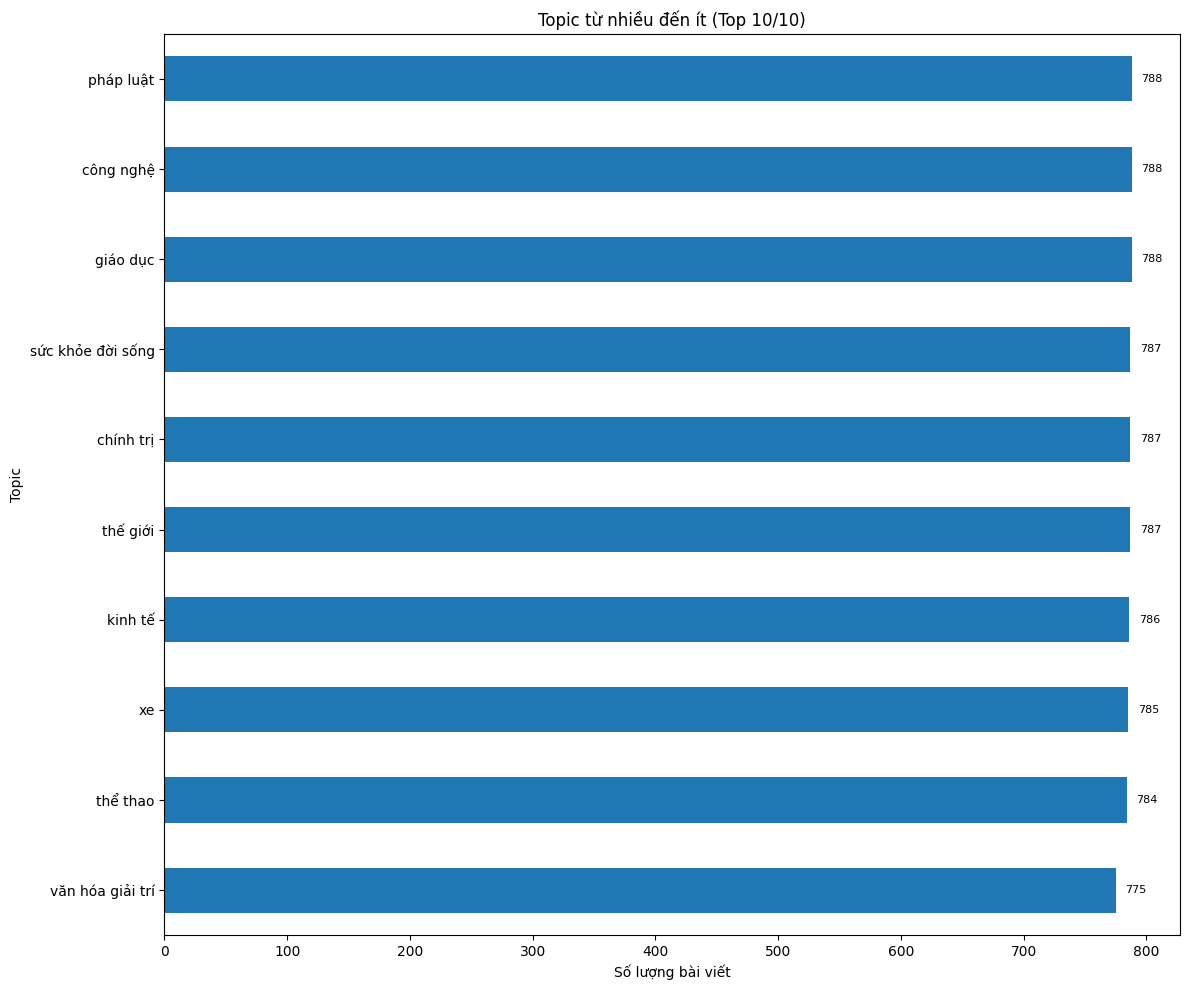

In [7]:
topic_counts = df['topic'].value_counts()

# Hiển thị tối đa 100 topic cho dễ nhìn (điều chỉnh nếu cần)
top_n = 100 if len(topic_counts) > 100 else len(topic_counts)
top_counts = topic_counts.head(top_n).sort_values(ascending=True)

plt.figure(figsize=(12, 10))
ax = top_counts.plot(kind='barh', color='#1f77b4')
ax.set_title(f'Topic từ nhiều đến ít (Top {top_n}/{len(topic_counts)})')
ax.set_xlabel('Số lượng bài viết')
ax.set_ylabel('Topic')

# Hiển thị nhãn số lượng ở cuối mỗi thanh
for i, v in enumerate(top_counts.values):
    ax.text(v + max(top_counts.values) * 0.01, i, str(v), va='center', fontsize=8)

plt.tight_layout()
plt.show()

In [8]:
# Cân bằng số lượng bản ghi giữa các topic bằng cách downsample về mức nhỏ nhất
target_per_topic = int(topic_counts.min())
print(f'Target per topic (min count): {target_per_topic}')

# Lấy ngẫu nhiên target_per_topic mẫu cho mỗi topic và xáo trộn lại
df = (
    df.groupby('topic', group_keys=False)
      .apply(lambda g: g.sample(n=target_per_topic, random_state=42))
      .sample(frac=1, random_state=42)
      .reset_index(drop=True)
)

# Kiểm tra lại phân phối sau khi cân bằng
print(df['topic'].value_counts())
print(df.shape)

Target per topic (min count): 775
topic
giáo dục             775
thể thao             775
thế giới             775
kinh tế              775
pháp luật            775
chính trị            775
văn hóa giải trí     775
công nghệ            775
sức khỏe đời sống    775
xe                   775
Name: count, dtype: int64
(7750, 10)


C:\Users\vuquo\AppData\Local\Temp\ipykernel_36624\248824675.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=target_per_topic, random_state=42))


In [10]:
df['content'] = df['content'].apply(remove_punctuation)
df['description'] = df['description'].apply(remove_punctuation)
df['title'] = df['title'].apply(remove_punctuation)
df.head()

,id,url,topic,publisher,publishedDate,crawAt,thumbnail,title,description,content
0,1.852508e+17,https://thanhnien.vn/la-diem-chuan-nganh-dieu-...,giáo dục,Mỹ Quyên,24/08/2025 09:47 GMT+7,2025-10-15 22:34:31.052870+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,Lạ Điểm chuẩn ngành điều dưỡng cao hơn ngành y...,Trường ĐH Tây Nguyên thông báo điểm chuẩn 37 n...,Theo đó các ngành cóđiểm chuẩncao nhất của Trư...
1,1.852510e+17,https://thanhnien.vn/truong-vinh-hien-len-tien...,thể thao,Thu Bồn,05/10/2025 10:28 GMT+7,2025-10-16 09:54:58.470723+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,Trương Vinh Hiển lên tiếng sau trận đấu gây tr...,Sau trận bán kết đầy ồn ào tại giải pickleball...,Trương Vinh Hiển cảm ơn đàn anh Trên trang cá ...
2,1.852509e+16,https://thanhnien.vn/giai-ma-dau-hieu-moi-ve-s...,thế giới,Hoàng Đình,07/09/2025 05:20 GMT+7,2025-10-15 21:57:46.414679+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,Giải mã dấu hiệu mới về sức mạnh quân sự Trung...,Tuần qua cuộc duyệt binh quy mô lớn của Trung ...,Trả lờiThanh Niên TS Satoru Nagao Viện Nghiên ...
3,1.852510e+17,https://thanhnien.vn/van-xuan-group-khang-dinh...,kinh tế,Thông tin dịch vụ,12/10/2025 08:00 GMT+7,2025-10-16 09:39:52.818591+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,Vạn Xuân Group khẳng định vị thế tiên phong bằ...,Ngày 10 10 2025 Vạn Xuân Group đã chính thức k...,Được đầu tư với quy mô “chưa từng có” lễ ra qu...
4,1.852505e+16,https://thanhnien.vn/cuu-vu-pho-khai-duoc-doan...,pháp luật,Trần Cường,28/05/2025 14:35 GMT+7,2025-10-16 12:22:32.649329+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,Cựu vụ phó khai được doanh nghiệp đưa cả tệp s...,Tại tòa cựu Vụ phó Vụ Thị trường trong nước Bộ...,Ngày 28 5 TAND TP Hà Nội mở phiên xét xử bị cá...


In [11]:
df['content'] = df['content'].apply(to_lower)
df['description'] = df['description'].apply(to_lower)
df['title'] = df['title'].apply(to_lower)
df.head()

,id,url,topic,publisher,publishedDate,crawAt,thumbnail,title,description,content
0,1.852508e+17,https://thanhnien.vn/la-diem-chuan-nganh-dieu-...,giáo dục,Mỹ Quyên,24/08/2025 09:47 GMT+7,2025-10-15 22:34:31.052870+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,lạ điểm chuẩn ngành điều dưỡng cao hơn ngành y...,trường đh tây nguyên thông báo điểm chuẩn 37 n...,theo đó các ngành cóđiểm chuẩncao nhất của trư...
1,1.852510e+17,https://thanhnien.vn/truong-vinh-hien-len-tien...,thể thao,Thu Bồn,05/10/2025 10:28 GMT+7,2025-10-16 09:54:58.470723+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,trương vinh hiển lên tiếng sau trận đấu gây tr...,sau trận bán kết đầy ồn ào tại giải pickleball...,trương vinh hiển cảm ơn đàn anh trên trang cá ...
2,1.852509e+16,https://thanhnien.vn/giai-ma-dau-hieu-moi-ve-s...,thế giới,Hoàng Đình,07/09/2025 05:20 GMT+7,2025-10-15 21:57:46.414679+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,giải mã dấu hiệu mới về sức mạnh quân sự trung...,tuần qua cuộc duyệt binh quy mô lớn của trung ...,trả lờithanh niên ts satoru nagao viện nghiên ...
3,1.852510e+17,https://thanhnien.vn/van-xuan-group-khang-dinh...,kinh tế,Thông tin dịch vụ,12/10/2025 08:00 GMT+7,2025-10-16 09:39:52.818591+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,vạn xuân group khẳng định vị thế tiên phong bằ...,ngày 10 10 2025 vạn xuân group đã chính thức k...,được đầu tư với quy mô “chưa từng có” lễ ra qu...
4,1.852505e+16,https://thanhnien.vn/cuu-vu-pho-khai-duoc-doan...,pháp luật,Trần Cường,28/05/2025 14:35 GMT+7,2025-10-16 12:22:32.649329+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,cựu vụ phó khai được doanh nghiệp đưa cả tệp s...,tại tòa cựu vụ phó vụ thị trường trong nước bộ...,ngày 28 5 tand tp hà nội mở phiên xét xử bị cá...


In [12]:
df['content'] = df['content'].apply(standardize_unicode)
df['description'] = df['description'].apply(standardize_unicode)
df['title'] = df['title'].apply(standardize_unicode)
df.head()

,id,url,topic,publisher,publishedDate,crawAt,thumbnail,title,description,content
0,1.852508e+17,https://thanhnien.vn/la-diem-chuan-nganh-dieu-...,giáo dục,Mỹ Quyên,24/08/2025 09:47 GMT+7,2025-10-15 22:34:31.052870+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,lạ điểm chuẩn ngành điều dưỡng cao hơn ngành y...,trường đh tây nguyên thông báo điểm chuẩn 37 n...,theo đó các ngành cóđiểm chuẩncao nhất của trư...
1,1.852510e+17,https://thanhnien.vn/truong-vinh-hien-len-tien...,thể thao,Thu Bồn,05/10/2025 10:28 GMT+7,2025-10-16 09:54:58.470723+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,trương vinh hiển lên tiếng sau trận đấu gây tr...,sau trận bán kết đầy ồn ào tại giải pickleball...,trương vinh hiển cảm ơn đàn anh trên trang cá ...
2,1.852509e+16,https://thanhnien.vn/giai-ma-dau-hieu-moi-ve-s...,thế giới,Hoàng Đình,07/09/2025 05:20 GMT+7,2025-10-15 21:57:46.414679+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,giải mã dấu hiệu mới về sức mạnh quân sự trung...,tuần qua cuộc duyệt binh quy mô lớn của trung ...,trả lờithanh niên ts satoru nagao viện nghiên ...
3,1.852510e+17,https://thanhnien.vn/van-xuan-group-khang-dinh...,kinh tế,Thông tin dịch vụ,12/10/2025 08:00 GMT+7,2025-10-16 09:39:52.818591+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,vạn xuân group khẳng định vị thế tiên phong bằ...,ngày 10 10 2025 vạn xuân group đã chính thức k...,được đầu tư với quy mô “chưa từng có” lễ ra qu...
4,1.852505e+16,https://thanhnien.vn/cuu-vu-pho-khai-duoc-doan...,pháp luật,Trần Cường,28/05/2025 14:35 GMT+7,2025-10-16 12:22:32.649329+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,cựu vụ phó khai được doanh nghiệp đưa cả tệp s...,tại tòa cựu vụ phó vụ thị trường trong nước bộ...,ngày 28 5 tand tp hà nội mở phiên xét xử bị cá...


In [13]:
df['content'] = df['content'].apply(normalize_text)
df['description'] = df['description'].apply(normalize_text)
df['title'] = df['title'].apply(normalize_text)
df.head()

,id,url,topic,publisher,publishedDate,crawAt,thumbnail,title,description,content
0,1.852508e+17,https://thanhnien.vn/la-diem-chuan-nganh-dieu-...,giáo dục,Mỹ Quyên,24/08/2025 09:47 GMT+7,2025-10-15 22:34:31.052870+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,lạ điểm chuẩn ngành điều dưỡng cao hơn ngành y...,trường đh tây nguyên thông báo điểm chuẩn 37 n...,theo đó các ngành cóđiểm chuẩncao nhất của trư...
1,1.852510e+17,https://thanhnien.vn/truong-vinh-hien-len-tien...,thể thao,Thu Bồn,05/10/2025 10:28 GMT+7,2025-10-16 09:54:58.470723+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,trương vinh hiển lên tiếng sau trận đấu gây tr...,sau trận bán kết đầy ồn ào tại giải pickleball...,trương vinh hiển cảm ơn đàn anh trên trang cá ...
2,1.852509e+16,https://thanhnien.vn/giai-ma-dau-hieu-moi-ve-s...,thế giới,Hoàng Đình,07/09/2025 05:20 GMT+7,2025-10-15 21:57:46.414679+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,giải mã dấu hiệu mới về sức mạnh quân sự trung...,tuần qua cuộc duyệt binh quy mô lớn của trung ...,trả lờithanh niên ts satoru nagao viện nghiên ...
3,1.852510e+17,https://thanhnien.vn/van-xuan-group-khang-dinh...,kinh tế,Thông tin dịch vụ,12/10/2025 08:00 GMT+7,2025-10-16 09:39:52.818591+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,vạn xuân group khẳng định vị thế tiên phong bằ...,ngày 10 10 2025 vạn xuân group đã chính thức k...,được đầu tư với quy mô “ chưa từng có ” lễ ra ...
4,1.852505e+16,https://thanhnien.vn/cuu-vu-pho-khai-duoc-doan...,pháp luật,Trần Cường,28/05/2025 14:35 GMT+7,2025-10-16 12:22:32.649329+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,cựu vụ phó khai được doanh nghiệp đưa cả tệp s...,tại tòa cựu vụ phó vụ thị trường trong nước bộ...,ngày 28 5 tand tp hà nội mở phiên xét xử bị cá...


In [14]:
df['title'] = df['title'].apply(split_words)
df['description'] = df['description'].apply(split_words)
df.head()

,id,url,topic,publisher,publishedDate,crawAt,thumbnail,title,description,content
0,1.852508e+17,https://thanhnien.vn/la-diem-chuan-nganh-dieu-...,giáo dục,Mỹ Quyên,24/08/2025 09:47 GMT+7,2025-10-15 22:34:31.052870+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,lạ điểm chuẩn ngành điều_dưỡng cao hơn ngành y...,trường đh tây_nguyên thông_báo điểm chuẩn 37 n...,theo đó các ngành cóđiểm chuẩncao nhất của trư...
1,1.852510e+17,https://thanhnien.vn/truong-vinh-hien-len-tien...,thể thao,Thu Bồn,05/10/2025 10:28 GMT+7,2025-10-16 09:54:58.470723+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,trương vinh_hiển lên_tiếng sau trận đấu gây tr...,sau trận bán_kết đầy ồn_ào tại giải pickleball...,trương vinh hiển cảm ơn đàn anh trên trang cá ...
2,1.852509e+16,https://thanhnien.vn/giai-ma-dau-hieu-moi-ve-s...,thế giới,Hoàng Đình,07/09/2025 05:20 GMT+7,2025-10-15 21:57:46.414679+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,giải_mã dấu_hiệu mới về sức_mạnh quân_sự trung...,tuần qua cuộc duyệt_binh quy_mô lớn của trung_...,trả lờithanh niên ts satoru nagao viện nghiên ...
3,1.852510e+17,https://thanhnien.vn/van-xuan-group-khang-dinh...,kinh tế,Thông tin dịch vụ,12/10/2025 08:00 GMT+7,2025-10-16 09:39:52.818591+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,vạn xuân group khẳng_định vị_thế tiên_phong bằ...,ngày 10 10 2025 vạn xuân group đã chính_thức k...,được đầu tư với quy mô “ chưa từng có ” lễ ra ...
4,1.852505e+16,https://thanhnien.vn/cuu-vu-pho-khai-duoc-doan...,pháp luật,Trần Cường,28/05/2025 14:35 GMT+7,2025-10-16 12:22:32.649329+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,cựu vụ phó khai được doanh_nghiệp đưa cả tệp s...,tại tòa cựu vụ phó vụ thị_trường trong nước bộ...,ngày 28 5 tand tp hà nội mở phiên xét xử bị cá...


In [15]:
df['content'] = df['content'].apply(split_words)
df.head()

,id,url,topic,publisher,publishedDate,crawAt,thumbnail,title,description,content
0,1.852508e+17,https://thanhnien.vn/la-diem-chuan-nganh-dieu-...,giáo dục,Mỹ Quyên,24/08/2025 09:47 GMT+7,2025-10-15 22:34:31.052870+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,lạ điểm chuẩn ngành điều_dưỡng cao hơn ngành y...,trường đh tây_nguyên thông_báo điểm chuẩn 37 n...,theo đó các ngành cóđiểm_chuẩncao nhất của trư...
1,1.852510e+17,https://thanhnien.vn/truong-vinh-hien-len-tien...,thể thao,Thu Bồn,05/10/2025 10:28 GMT+7,2025-10-16 09:54:58.470723+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,trương vinh_hiển lên_tiếng sau trận đấu gây tr...,sau trận bán_kết đầy ồn_ào tại giải pickleball...,trương vinh_hiển cảm_ơn đàn_anh trên trang cá_...
2,1.852509e+16,https://thanhnien.vn/giai-ma-dau-hieu-moi-ve-s...,thế giới,Hoàng Đình,07/09/2025 05:20 GMT+7,2025-10-15 21:57:46.414679+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,giải_mã dấu_hiệu mới về sức_mạnh quân_sự trung...,tuần qua cuộc duyệt_binh quy_mô lớn của trung_...,trả lờithanh_niên ts satoru nagao_viện nghiên_...
3,1.852510e+17,https://thanhnien.vn/van-xuan-group-khang-dinh...,kinh tế,Thông tin dịch vụ,12/10/2025 08:00 GMT+7,2025-10-16 09:39:52.818591+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,vạn xuân group khẳng_định vị_thế tiên_phong bằ...,ngày 10 10 2025 vạn xuân group đã chính_thức k...,được đầu_tư với quy_mô “ chưa từng có ” lễ ra_...
4,1.852505e+16,https://thanhnien.vn/cuu-vu-pho-khai-duoc-doan...,pháp luật,Trần Cường,28/05/2025 14:35 GMT+7,2025-10-16 12:22:32.649329+07:00,https://images2.thanhnien.vn/thumb_w/640/52806...,cựu vụ phó khai được doanh_nghiệp đưa cả tệp s...,tại tòa cựu vụ phó vụ thị_trường trong nước bộ...,ngày 28 5 tand tp hà_nội mở phiên xét_xử bị_cá...


In [ ]:
# load Vietnamese stopwords and apply stopword removal to content and title
# with open('vietnamese-stopwords.txt', 'r', encoding='utf-8-sig') as f:
#     stopwords = {line.strip() for line in f}
# print(stopwords)
# print(len(stopwords))
# df['content'] = df['content'].apply(stopword_removal, stopwords=stopwords)
# df['title'] = df['title'].apply(stopword_removal, stopwords=stopwords)
# df.head()

{'bây chừ', 'chốc chốc', 'thảo nào', 'nhân dịp', 'dễ thường', 'chính thị', 'vả chăng', 'chùn chũn', 'ngày ngày', 'ra sao', 'oái', 'tà tà', 'ắt là', 'chứ', 'tọt', 'bất thình lình', 'bấy giờ', 'ngọn', 'trước đây', 'trước đó', 'thốt nhiên', 'xiết bao', 'chẳng nữa', 'chết thật', 'tốc tả', 'tuốt luốt', 'nghe đâu', 'bay biến', 'nhiều', 'cha chả', 'nhất sinh', 'thoạt', 'chính', 'quá sá', 'do', 'nhưng mà', 'tất cả', 'so', 'sao', 'suýt', 'bội phần', 'hầu hết', 'bấy lâu', 'ơ', 'ra phết', 'ngộ nhỡ', 'nền', 'trỏng', 'bởi chưng', 'cật sức', 'ai', 'phỉ phui', 'cùng', 'chung quy', 'nhất định', 'thôi', 'cho tới', 'ngoải', 'trếu tráo', 'bản', 'hay', 'trước kia', 'văng tê', 'tù tì', 'nhất luật', 'ứ hự', 'chuyện', 'riêng', 'quả là', 'tựu trung', 'của', 'cổ lai', 'này', 'toà', 'nh', 'chợt', 'lớn', 'cuộc', 'dù rằng', 'dưới', 'bất đồ', 'cô mình', 'công nhiên', 'xăm xăm', 'muốn', 'sất', 'nhân tiện', 'ử', 'vì thế', 'dì', 'vung thiên địa', 'thế nên', 'bấy chầy', 'bạn', 'amen', 'em', 'trời đất ơi', 'lúc', 'tôi'

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,15594,khánh linh,tài_kiến góp dân dự_thảo thông_tư sửa_đổi bổ_s...,1,1,tienphong,điều_chỉnh giá kiểm_định xe_giới trung_tâm đăn...,kinh tế,https://tienphong.vn/dieu-chinh-gia-kiem-dinh-...,2022-06-18 08:58:34.610567
1,129311,thiên minh,14 7 công_an tx ba đồn cơ_quan cảnh_sát tra cô...,1,1,tienphong,khởi_tố đối_tượng lừa_đảo chạy bao đậu công_ch...,pháp luật,https://tienphong.vn/khoi-to-doi-tuong-lua-dao...,2022-07-14 18:16:22.416107
2,56438,xuân mai,subaru forester dần trở phổ_biến phân_khúc cro...,3,1,thanhnien.vn,subaru forester 2022 phiên thể_thao sti sport,xe,https://thanhnien.vn/subaru-forester-2022-co-t...,2022-06-29 15:21:59.301578
3,123115,NaN,tình_huống đời hầu_ta chứng_kiến cảnh đứa trẻ ...,2,1,kenh14,3 kiểu thông_minh giả trẻ tác_dụng ngược cha_m...,giáo dục,https://kenh14.vn/3-kieu-thong-minh-gia-cua-tr...,2022-07-13 17:10:40.033391
4,73255,NaN,tham_dự lớp tập_huấn 70 cán cđcs trực công_đoà...,2,1,laodong,thơ 70 cán cđcs tập_huấn công_tác thi_đua khen...,chính trị,https://laodong.vn/ldld-can-tho/can-tho-hon-70...,2022-07-01 20:55:06.349263


In [16]:
df.to_csv(output_path_file, index=False)
